# Import librairies

In [1]:
# Library for data manipulation
import pandas as pd

# Library for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library for handling Python warnings
import warnings
warnings.filterwarnings('ignore')

# Loading data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/UMBC-Data-Science/DATA602Datasets/main/winequality-white.csv', sep = ';')

# Data observation

In [3]:
print(f'Rows: {df.shape[0]:,}')
print(f'Columns: {df.shape[1]:,}')

Rows: 4,898
Columns: 12


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
# Display 5 first observations contents
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Attributes types Identification

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Input variables: 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol' which are of double precision float data type.

Target Variable: 'quality' which is of type integer.

# Checking and Cleaning Missing Values

In [7]:
df.isna().sum().value_counts(dropna=False)

0    12
dtype: int64

In [8]:
df.dropna().shape

(4898, 12)

No null variable presents in our dataset. The rows and columns remain the same as the original dataset.

# Summary of Descriptive Statistics

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


This summary gives a good description of statistics that can explain our dataset as whole.

# Correlation between attributes (Heatmap)

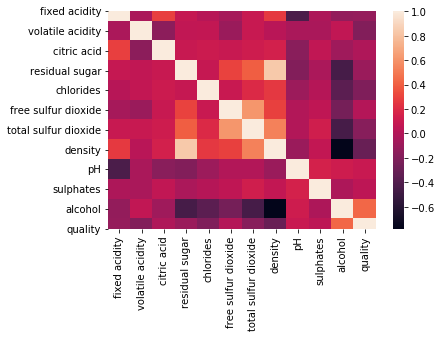

In [10]:
sns.heatmap(df.corr())
plt.show()

The heatmap above gives a better understanding of the relationships or correlation between all of the variables in our dataset. For example, alcohol is strongly correlated to the wine quality compared to the other variables.

# Density distributions of all the attributes  in the dataset

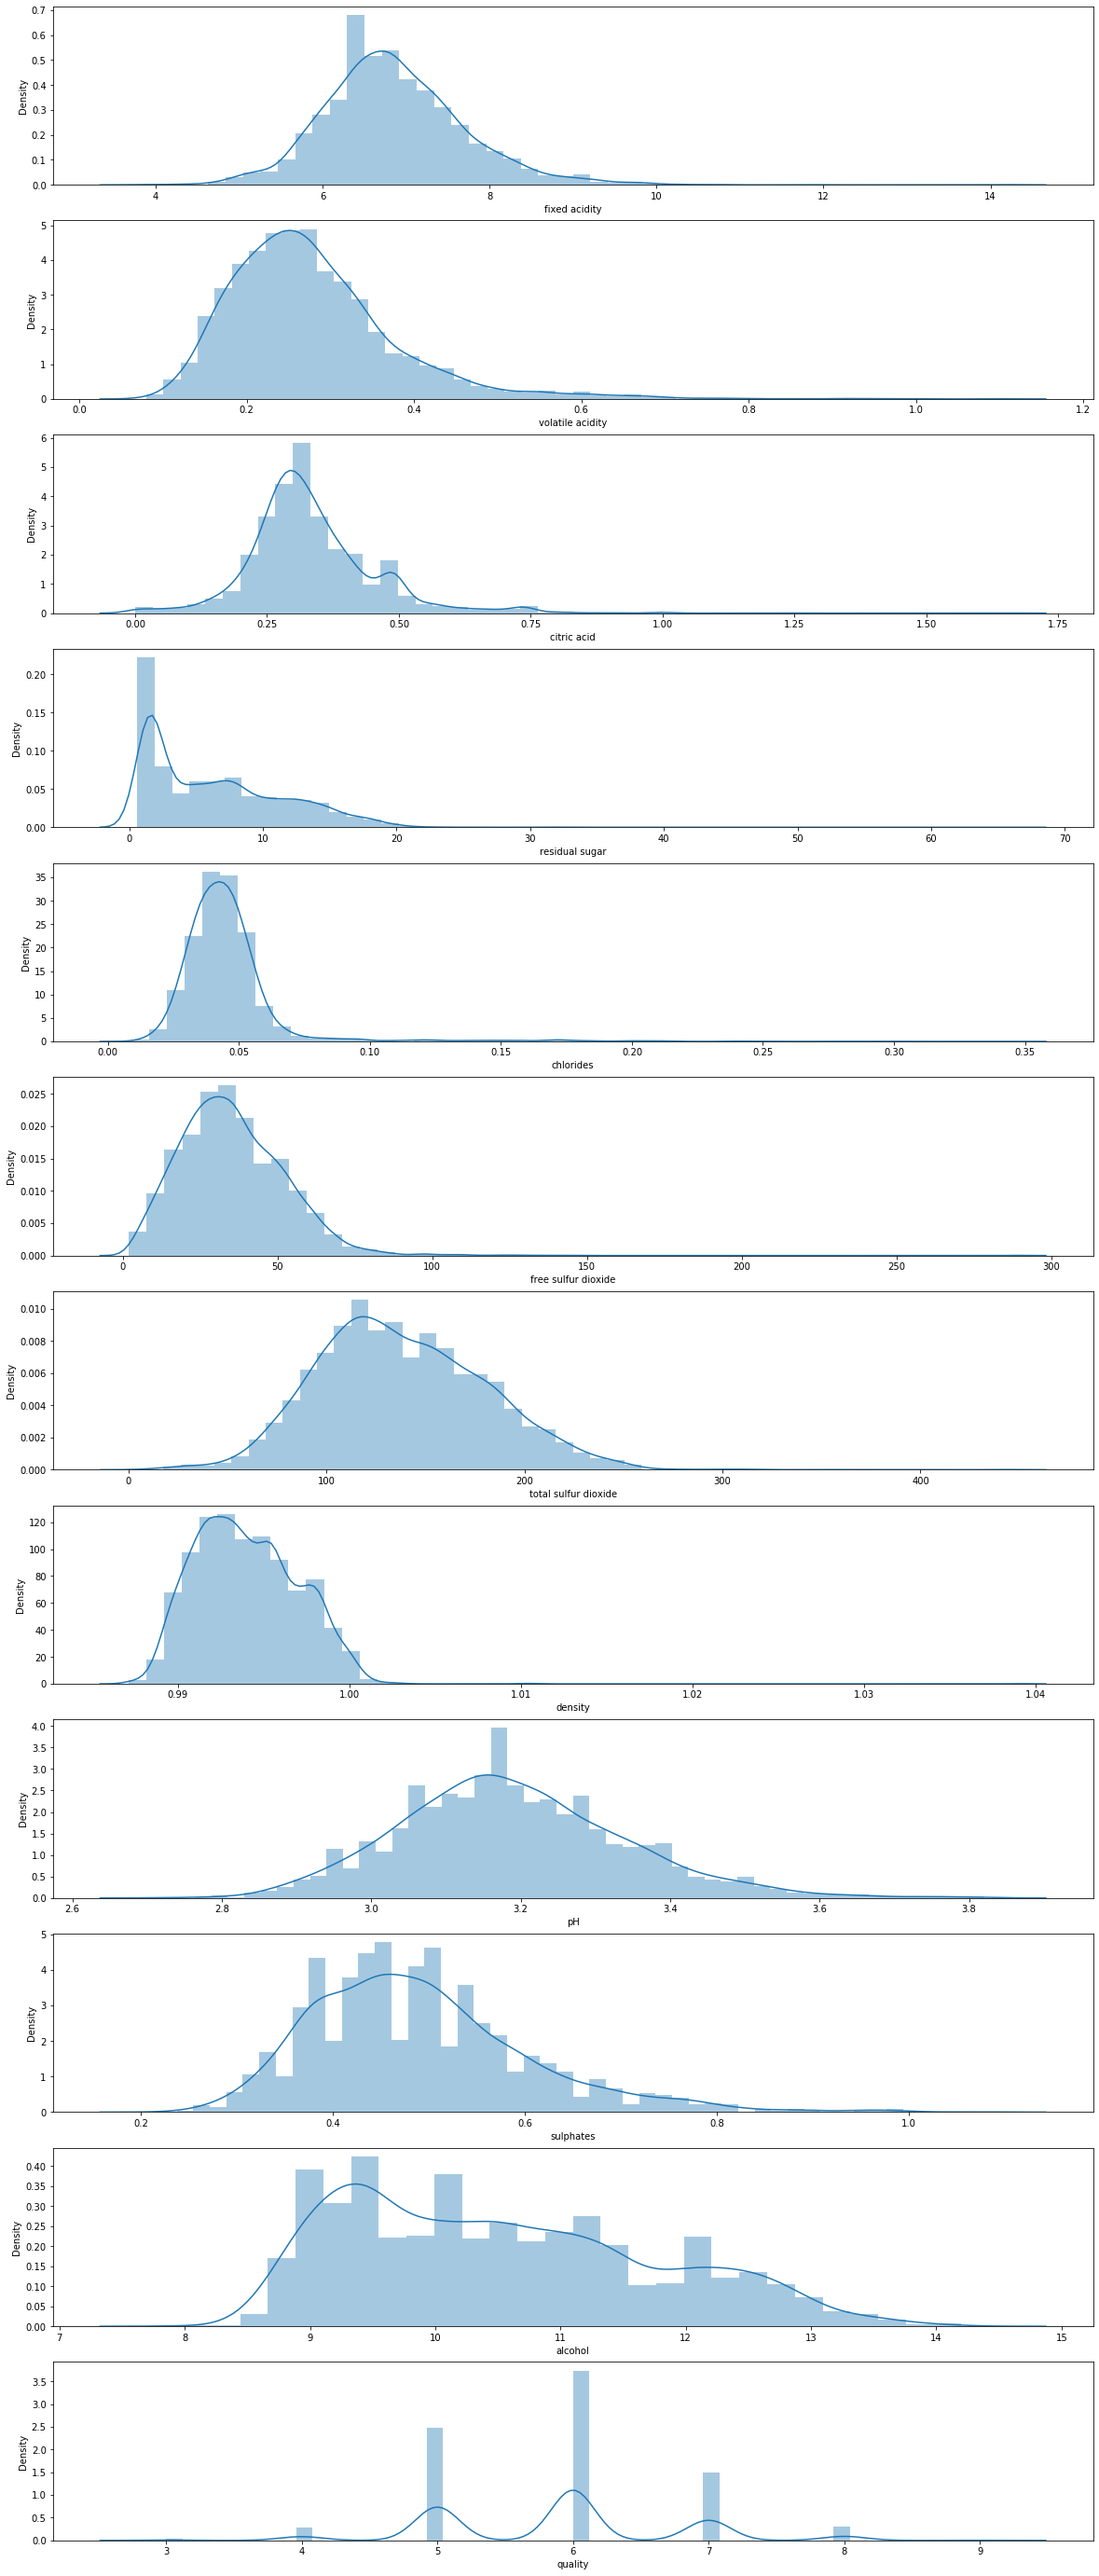

In [12]:
f, axes = plt.subplots(len(df.columns), figsize=(20, 50), sharex=False)
for i in range(len(df.columns)):
    d = sns.distplot( df[df.columns[i]], ax=axes[i])
    d.set_xlabel(df.columns[i],fontsize=10)

The above visualizations present an excellent exploratory analysis by showing how all the variables are distributed.

# Box Plot for wine quality continuous variable

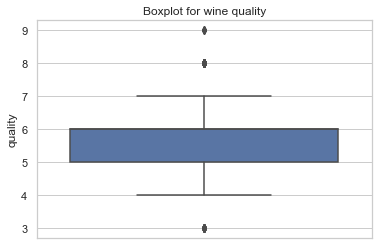

In [13]:
sns.set(style="whitegrid")
sns.boxplot(y = df.quality)
plt.title('Boxplot for wine quality')
plt.show()

This boxplot cleary show me the outliers that are present in the wine quality variable as our target.

# Transform continuous variable into categorical variable

In [14]:
quality_values = lambda x: 'Good' if x >= 7 else 'Bad' if x<7 else None
df['quality_transformed'] = df['quality'].apply(quality_values)

Given how the quality of our wine are distributed, I transformed the values into two categories: "Good" and "Bad" where the wine quality of 7 and higher is considered as "Good", and the wine quality below 7 is considered as "Bad".

# Analysis of the wine quality categories

In [15]:
df['quality_transformed'].value_counts()

Bad     3838
Good    1060
Name: quality_transformed, dtype: int64

In [18]:
df.quality_transformed.value_counts(normalize=True)

Bad     0.783585
Good    0.216415
Name: quality_transformed, dtype: float64

The Bad quality wine represent around 78%, and the remaining 21% are good quality.

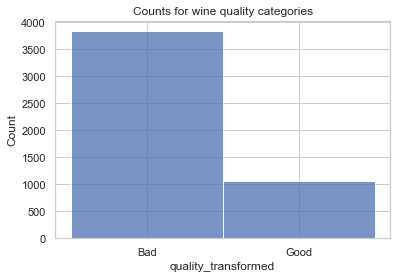

In [16]:
sns.histplot(x = df.quality_transformed)
plt.title('Counts for wine quality categories')
plt.show()

# Relationship between categorical and numerical variables

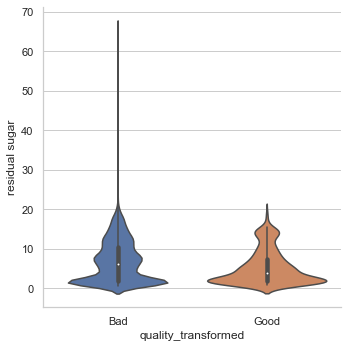

In [17]:
sns.catplot(y = 'residual sugar', x = 'quality_transformed', data = df, kind = 'violin')

This visualization provides a representation of the relationship between the numerical and two categorical variables. It indicates that there is a high content of residual sugar in bad wine compared to good wine.